<img style="float: left;" src="pic2.png">

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied ML & DS with Python Program)

# Anomaly Detection

## 1. Goodness-of-Fit Methods

### 1.1 Data Collection or Creation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.font_manager
from scipy import stats

import sklearn

In [2]:
# Lets create the dataset

In [3]:
n_dim = 2
n_samples = 1000
outlier_ratio = 0.01
n_inliers = int(n_samples*(1-outlier_ratio))
n_outliers = n_samples - n_inliers

In [4]:
n_inliers

990

In [5]:
n_outliers

10

In [6]:
np.random.seed(10)
inliers = pd.DataFrame(np.random.randn(n_inliers,n_dim), columns = ['X0', 'X1']) 
#Creating inliers that follow normal (gaussian distribution)
inliers.head()

,X0,X1
0,1.331587,0.715279
1,-1.545400,-0.008384
2,0.621336,-0.720086
3,0.265512,0.108549
4,0.004291,-0.174600


In [7]:
inliers.shape

(990, 2)

In [11]:
np.random.seed(10)
outliers = pd.DataFrame(np.random.uniform(low = -10, high = 10, size = (n_outliers, n_dim)), columns = ['X0', 'X1']) 
# creating outliers that follow uniform distribution
outliers.index = np.arange(n_inliers,n_samples)

In [12]:
outliers.head()

,X0,X1
990,5.426413,-9.584961
991,2.672965,4.976078
992,-0.029860,-5.504067
993,-6.038743,5.210614
994,-6.617783,-8.233204


In [13]:
outliers.shape

(10, 2)

In [14]:
X = pd.concat([inliers,outliers], axis = 0) # combine them to create a dataset
X.head(3)

,X0,X1
0,1.331587,0.715279
1,-1.545400,-0.008384
2,0.621336,-0.720086


In [16]:
X.tail(15) # These are the outliers

,X0,X1
985,0.518433,-0.669287
986,-0.089216,-0.200360
987,-0.210669,0.637671
988,1.453864,-0.406279
989,0.123790,0.982680
990,5.426413,-9.584961
991,2.672965,4.976078
992,-0.029860,-5.504067
993,-6.038743,5.210614
994,-6.617783,-8.233204


In [17]:
X.shape

(1000, 2)

In [18]:
y = pd.Series(np.ones(n_samples))
y[n_inliers:] = -1
y[989:]

989    1.0
990   -1.0
991   -1.0
992   -1.0
993   -1.0
994   -1.0
995   -1.0
996   -1.0
997   -1.0
998   -1.0
999   -1.0
dtype: float64

In [19]:
y.value_counts()

 1.0    990
-1.0     10
dtype: int64

### 1.2. Data visualization

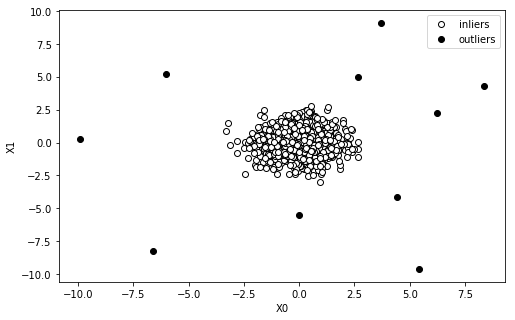

In [22]:
fig = plt.figure(figsize = (8,5))
plt.scatter(X.iloc[:n_inliers,0], X.iloc[:n_inliers,1], c = 'w', edgecolor = 'k', label='inliers')
plt.scatter(X.iloc[n_inliers:,0],X.iloc[n_inliers:,1], c = 'k', edgecolor = 'k', label='outliers')

plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')

plt.show()

### 1.3 Elliptic Envelope Model

In [23]:
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
# Strong Assumption for this method is that inliers come from a known analytical distribution
# This method is only minimally effected by presence of outliers

In [35]:
ee_model = EllipticEnvelope(contamination=0.015, random_state=10)
ee_model.fit(X) 
#Fit the model on the data. No target variable involved here. So not the typicl supervised ML
# This is anomaly detection, where we fit the model on just X

EllipticEnvelope(assume_centered=False, contamination=0.015, random_state=10,
         store_precision=True, support_fraction=None)

In [36]:
y_pred = ee_model.predict(X) # Make predictions on the entire data
confusion_matrix(y,y_pred)

array([[ 10,   0],
       [  5, 985]], dtype=int64)

In [37]:
accuracy_score(y,y_pred) # accuracy score

0.995

In [38]:
y_pred # Predictions based on some threshold (typically contamination ratio)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

**Visualizing the decision boundary**

C:\Users\palle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


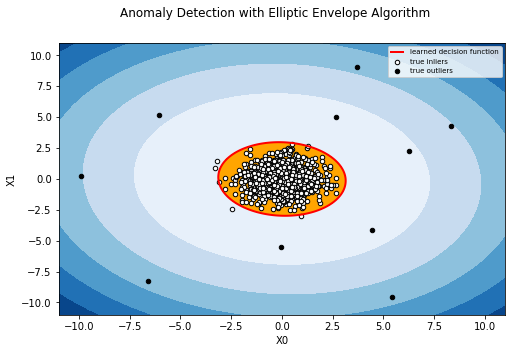

In [40]:
fig = plt.figure(figsize = (8,5))
scores_pred = ee_model.decision_function(X) 
threshold = stats.scoreatpercentile(scores_pred, 100*0.015)

xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000)) 

Z = ee_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                        linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                     colors='orange')
b = plt.scatter(X.iloc[:-n_outliers, 0], X.iloc[:-n_outliers, 1], c='white',
                        s=20, edgecolor='k')
c = plt.scatter(X.iloc[-n_outliers:, 0], X.iloc[-n_outliers:, 1], c='black',
                        s=20, edgecolor='k')
plt.axis('tight')
plt.legend([a.collections[0], b, c], 
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=7),
        loc='upper right')

plt.xlabel('X0')
plt.ylabel('X1')
plt.xlim((-11, 11))
plt.ylim((-11, 11))
plt.suptitle("Anomaly Detection with Elliptic Envelope Algorithm")

plt.show()

In [41]:
# By periodically fitting the elliptical envelope to new data,we can have a constantly updating decision boundary
# ...and we can easily classify new incoming points...

In [42]:
# Above method worked well for a dataset which follows Guassian Distribution.
# Lets see its performance with another set which doesnt follow any known distribution

**Data with non-Guassian distribution**

In [43]:
n_inliers//3

330

In [44]:
np.random.seed(10)

d0 = pd.DataFrame(np.random.randn(n_inliers//3, n_dim) - 4)
d1 = pd.DataFrame(np.random.randn(n_inliers//3, n_dim))
d2 = pd.DataFrame(np.random.randn(n_inliers//3, n_dim) + 4)
d3 = pd.DataFrame(np.random.uniform(low=-10, high=10, size=(n_outliers, n_dim)))

# Add outliers sampled from a random uniform distribution
X_nong = pd.concat([d0, d1, d2, d3], axis=0)

X_nong.index = np.arange(0,n_samples)

X_nong.columns = ['X0', 'X1']

# Generate target variables, 1 for inliers and -1 for outliers
y_nong = pd.Series(np.ones(n_samples))
y_nong[n_inliers:] = -1

In [45]:
X_nong.shape

(1000, 2)

In [46]:
X_nong.head()

,X0,X1
0,-2.668413,-3.284721
1,-5.545400,-4.008384
2,-3.378664,-4.720086
3,-3.734488,-3.891451
4,-3.995709,-4.174600


In [47]:
X_nong.tail(10) # These are the outliers

,X0,X1
990,3.795700,-7.534790
991,-6.376214,-9.339749
992,-1.966245,6.047616
993,-2.421614,-1.672514
994,-3.193777,-0.204540
995,-6.278077,-5.110245
996,4.390139,7.985467
997,-2.163814,-2.664210
998,8.305344,8.448426
999,6.546190,5.357028


In [48]:
y_nong.shape

(1000,)

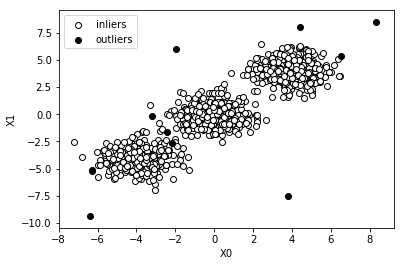

In [49]:
plt.scatter(X_nong.iloc[:n_inliers,0], X_nong.iloc[:n_inliers,1], c = 'w', edgecolor = 'k', label='inliers')
plt.scatter(X_nong.iloc[n_inliers:,0], X_nong.iloc[n_inliers:,1], c = 'k', edgecolor = 'k', label='outliers')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()

**Fitting ellipctic envelope model to the non-gaussian data**

In [50]:
ee_model_nong = EllipticEnvelope(contamination=outlier_ratio, random_state=10)
ee_model_nong.fit(X_nong) 
#Fit the model on the data. No target variable involved here. So not the typicl supervised ML
# This is anomaly detection, where we fit the model 

EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=10,
         store_precision=True, support_fraction=None)

In [51]:
y_pred_nong = ee_model_nong.predict(X_nong) # Make predictions on the entire data
confusion_matrix(y,y_pred_nong)

array([[  4,   6],
       [  6, 984]], dtype=int64)

In [52]:
# There are 12 errors now. 

In [53]:
accuracy_score(y_nong,y_pred_nong) # accuracy score

0.988

**Visualizing the decision boundary**

C:\Users\palle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


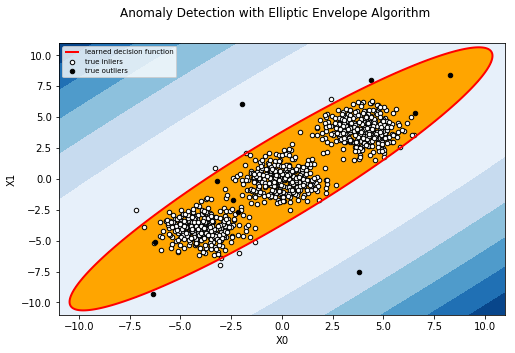

In [54]:
fig = plt.figure(figsize = (8,5))
scores_pred = ee_model_nong.decision_function(X_nong) 
threshold = stats.scoreatpercentile(scores_pred, 100*outlier_ratio)

xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000)) 

Z = ee_model_nong.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                        linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                     colors='orange')
b = plt.scatter(X_nong.iloc[:-n_outliers, 0], X_nong.iloc[:-n_outliers, 1], c='white',
                        s=20, edgecolor='k')
c = plt.scatter(X_nong.iloc[-n_outliers:, 0], X_nong.iloc[-n_outliers:, 1], c='black',
                        s=20, edgecolor='k')
plt.axis('tight')
plt.legend([a.collections[0], b, c], 
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=7),
        loc='upper left')

plt.xlabel('X0')
plt.ylabel('X1')
plt.xlim((-11, 11))
plt.ylim((-11, 11))
plt.suptitle("Anomaly Detection with Elliptic Envelope Algorithm")

plt.show()

In [55]:
# By periodically fitting the elliptical envelope to new data,we can have a constantly updating decision boundary
# ...and we can easily classify new incoming points...

In [56]:
# Elliptic envelope works for better for Guassian distribution and for low dimensional datasets

### 1.4 Isolation Forest

In [58]:
# Works better for high-dimensional datasets

In [59]:
# Algorithm operates by computing number of splits required to isolate an example.
# How many times it needs to perform splits on features in the dataset before it ends up with a region containing only
# .. asingle example.
# Measures the path length of recursive splits from the root of tree. Anomalous points should have shorter paths.

In [60]:
from sklearn.ensemble import IsolationForest

In [61]:
if_model = IsolationForest(contamination = 0.01, random_state=10)
if_model.fit(X_nong)
#contamination ratio: shortest 1% of path will be considered as anomalies.

C:\Users\palle\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=10, verbose=0)

In [62]:
y_pred_if = if_model.predict(X_nong)
confusion_matrix(y,y_pred_if)

C:\Users\palle\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([[  7,   3],
       [  3, 987]], dtype=int64)

In [63]:
# six errors, better than the elliptic envelope

In [64]:
accuracy_score(y_nong, y_pred_if)

0.994

**Visualizing the decision Boundary**

C:\Users\palle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


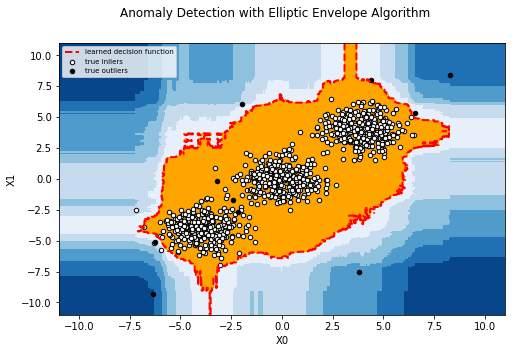

In [65]:
fig = plt.figure(figsize = (8,5))
scores_pred = if_model.decision_function(X_nong) 
threshold = stats.scoreatpercentile(scores_pred, 100*outlier_ratio)

xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000)) 

Z = if_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                        linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                     colors='orange')
b = plt.scatter(X_nong.iloc[:-n_outliers, 0], X_nong.iloc[:-n_outliers, 1], c='white',
                        s=20, edgecolor='k')
c = plt.scatter(X_nong.iloc[-n_outliers:, 0], X_nong.iloc[-n_outliers:, 1], c='black',
                        s=20, edgecolor='k')
plt.axis('tight')
plt.legend([a.collections[0], b, c], 
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=7),
        loc='upper left')

plt.xlabel('X0')
plt.ylabel('X1')
plt.xlim((-11, 11))
plt.ylim((-11, 11))
plt.suptitle("Anomaly Detection with Elliptic Envelope Algorithm")

plt.show()